In [151]:
import glob, re
import matplotlib.pyplot as plt

def parseYoloResult(path):
    lossL = []
    ap50L = []
    for line in open(path,"r").readlines():
        lineL = list(filter(bool,line.split(" ")))
        lossL.append( float(lineL[5]) )
        ap50L.append( float(lineL[10]) )
    #
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(lossL)
    plt.grid('on')
    plt.ylim(0,0.1)
    plt.legend(labels=['val'])
    
    plt.subplot(1,2,2)
    plt.xlabel("epoch")
    plt.ylabel("AP50")
    plt.plot(ap50L)
    plt.grid('on')
    plt.legend(labels=['val'])
    plt.show()
    return lossL, ap50L

def getBestAP(path):
    txtL  = open(path).read().split("---")
    bestL = list(map(lambda s:re.findall('(best[_,0-9]*).pt',s), txtL))
    bestL = sorted(list(set([ L[0] for L in bestL if L ])))
    epL   = list(map(lambda s:re.findall('epoch_([0-9]*).pt',s), txtL))
    epL   = sorted(list(set([ L[0] for L in epL if L ])))
    valueL = list(filter(lambda s:' all ' in s, txtL))
    valueL = list(map(lambda s:re.findall("all(.*)\n",s)[0], valueL))
    valueL = list(map(lambda s:list(filter(bool,s.split(' '))), valueL))
    apL  = [ float(L[4]) for L in valueL ]
    assert len(bestL)+len(epL)==len(apL), (len(bestL), len(epL), len(valueL))
    print( max(zip(apL,bestL+epL)) )
    
getBestAP("../_codes/eval.txt")

(0.879, '2749')


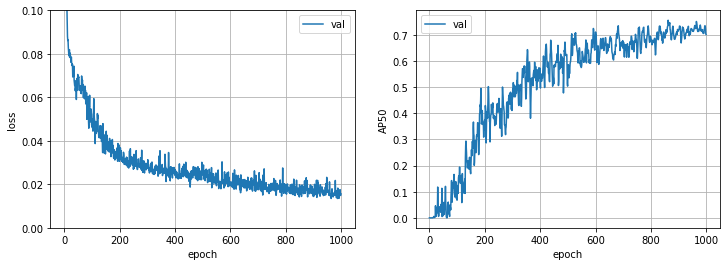

0.756

In [129]:
T = parseYoloResult("../runs/train/yolov75_sample_lr1_ep1000_best/results.txt")
max(T[1])

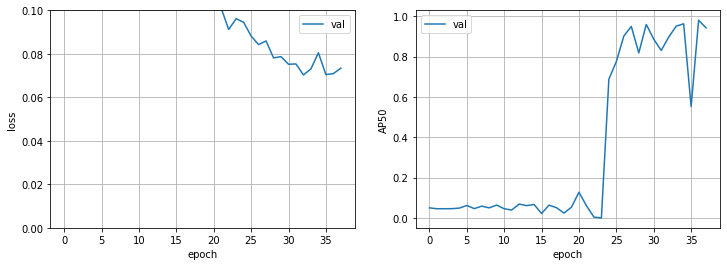

In [90]:
T = parseYoloResult("../runs/train/yolov78_usb/results.txt") # USB

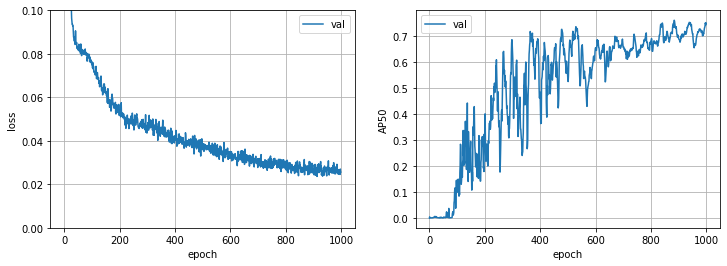

In [91]:
T = parseYoloResult("../runs/train/yolov79_newSample_lr0_ep1000/results.txt") # top-lr-rate=0

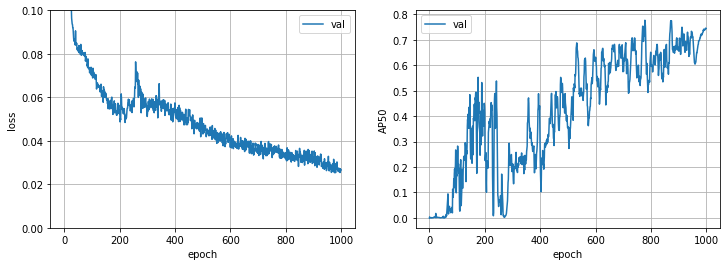

In [92]:
T = parseYoloResult("../runs/train/yolov710_newSample_lr1_ep1000/results.txt") # top-lr-rate=0.9

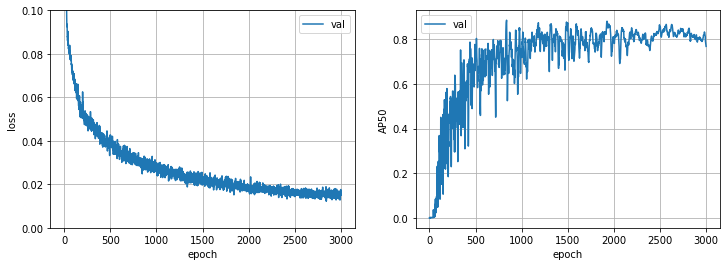

In [99]:
T = parseYoloResult("../runs/train/yolov7/results.txt")

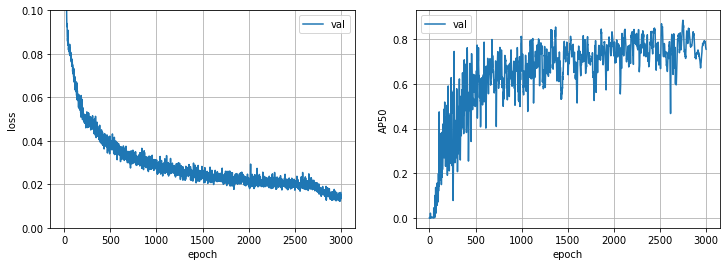

In [98]:
T = parseYoloResult("../runs/train/yolov711/results.txt")